<a href="https://colab.research.google.com/github/CristinaMarsh/Learning_/blob/main/TStool/LearningGluonts_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install gluonts
!pip install mxnet-cu101

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 360.0 MB 19 kB/s 


# Case 1

Thanks https://github.com/IshanJainAI/Forecasting-with-DeepAR/blob/main/Time_Series_DeepAR_model.ipynb

In [1]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
import mxnet as mx
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [3]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         47           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        105           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        618           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        126           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1338           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14732            True  
house-pr

In [4]:
!kaggle competitions download -c recruit-restaurant-visitor-forecasting 

recruit-restaurant-visitor-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip "/content/recruit-restaurant-visitor-forecasting.zip" -d "/content/"

Archive:  /content/recruit-restaurant-visitor-forecasting.zip
replace /content/air_reserve.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/air_reserve.csv.zip  
replace /content/air_store_info.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/air_store_info.csv.zip  
replace /content/air_visit_data.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/air_visit_data.csv.zip  
replace /content/date_info.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/date_info.csv.zip  
replace /content/hpg_reserve.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/hpg_reserve.csv.zip  
replace /content/hpg_store_info.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/hpg_store_info.csv.zip  
replace /content/sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/sample_submission.csv.zip  
replace /content/store_id_relation.csv.zip? [y]es, [n]o, [

In [6]:
!unzip "/content/air_visit_data.csv.zip" -d "/content/"

Archive:  /content/air_visit_data.csv.zip
replace /content/air_visit_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/air_visit_data.csv  


In [33]:
!unzip "/content/air_reserve.csv.zip" -d "/content/"

Archive:  /content/air_reserve.csv.zip
  inflating: /content/air_reserve.csv  


In [40]:
!unzip "/content/date_info.csv.zip" -d "/content/"

Archive:  /content/date_info.csv.zip
  inflating: /content/date_info.csv  


In [20]:
df = pd.read_csv('/content/air_visit_data.csv')

In [8]:
df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [25]:
df.shape[0]/df.iloc[:,0].nunique()

304.11097708082025

In [26]:
df.air_store_id.value_counts() 

air_5c817ef28f236bdf    477
air_36bcf77d3382d36e    476
air_a083834e7ffe187e    476
air_d97dabf7aae60da5    476
air_232dcee6f7c51d37    475
                       ... 
air_1c0b150f9e696a5f     51
air_a17f0778617c76e2     47
air_789103bf53b8096b     41
air_a9a380530c1e121f     40
air_900d755ebd2f7bbd     20
Name: air_store_id, Length: 829, dtype: int64

In [9]:

df = df.pivot(index='visit_date', columns='air_store_id')['visitors']
df.head()

air_store_id,air_00a91d42b08b08d9,air_0164b9927d20bcc3,air_0241aa3964b7f861,air_0328696196e46f18,air_034a3d5b40d5b1b1,air_036d4f1ee7285390,air_0382c794b73b51ad,air_03963426c9312048,air_04341b588bde96cd,air_049f6d5b402a31b2,...,air_fd6aac1043520e83,air_fdc02ec4a3d21ea4,air_fdcfef8bd859f650,air_fe22ef5a9cbef123,air_fe58c074ec1445ea,air_fea5dc9594450608,air_fee8dcf4d619598e,air_fef9ccb3ba0da2f7,air_ffcc2d5087e1b476,air_fff68b929994bfbd
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,9.0,NaN,NaN,NaN,NaN,62.0,23.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,17.0,NaN,NaN,NaN,NaN,30.0,35.0,NaN,...,36.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.fillna(0)
df = pd.DataFrame(df.sum(axis=1))

In [29]:
df.head()

,0
visit_date,
2016-01-01,1033.0
2016-01-02,1764.0
2016-01-03,2368.0
2016-01-04,3326.0
2016-01-05,3927.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    478 non-null    object 
 1   y       478 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [11]:
df = df.reset_index(drop=False)
df.columns = ['date','y']

In [32]:
df.shape

(478, 2)

In [16]:
start = pd.Timestamp('01-01-2016',freq='D')
step = 4*7
'''
Unlogically, it is necessary to specify the seasonality “H” for hourly..
..rather than “D” for daily to obtain a reasonably accurate forecast. 
This is likely due to an unresolved bug in gluonts at the time of writing.
'''

# train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
train_ds = ListDataset([
                        {'target':df.loc[:step,'y'],'start':start} #{'target':df.loc[:step,'y'] error [:df.shape[0]-step]
], freq='D')

# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset([{'target': df['y'], 'start': start}], freq='D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [17]:
np.random.seed(7)
mx.random.seed(7)


# need to create an estimator called the DeepAREstimator....which in turn uses a trainer.

estimator = DeepAREstimator(prediction_length=28,
                            context_length=100,
                            freq='D',
                            trainer=Trainer(#ctx="gpu", # remove if running on windows
                                            epochs=5,
                                            learning_rate=1e-3,
                                            num_batches_per_epoch=100)
                            )

predictor = estimator.train(train_ds)

100%|██████████| 100/100 [00:09<00:00, 10.27it/s, epoch=5/5, avg_epoch_loss=5.43]


In [18]:
# Prediction

predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

-397.771416730734


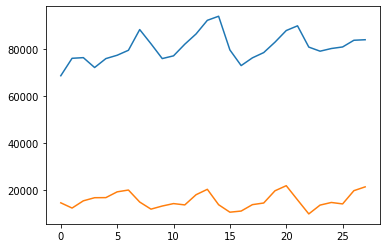

In [19]:
# R2 score and prediction graph

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

print(r2_score(list(test_ds)[0]['target'][-step:], predictions))

plt.plot(predictions,label='Predictions')
plt.plot(list(test_ds)[0]['target'][-step:],label='Observed')
plt.show()

## Original

In [23]:
y = pd.read_csv('air_visit_data.csv')

In [24]:
y = y.pivot(index='visit_date', columns='air_store_id')['visitors']
y.head()

air_store_id,air_00a91d42b08b08d9,air_0164b9927d20bcc3,air_0241aa3964b7f861,air_0328696196e46f18,air_034a3d5b40d5b1b1,air_036d4f1ee7285390,air_0382c794b73b51ad,air_03963426c9312048,air_04341b588bde96cd,air_049f6d5b402a31b2,...,air_fd6aac1043520e83,air_fdc02ec4a3d21ea4,air_fdcfef8bd859f650,air_fe22ef5a9cbef123,air_fe58c074ec1445ea,air_fea5dc9594450608,air_fee8dcf4d619598e,air_fef9ccb3ba0da2f7,air_ffcc2d5087e1b476,air_fff68b929994bfbd
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,9.0,NaN,NaN,NaN,NaN,62.0,23.0,NaN,...,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,17.0,NaN,NaN,NaN,NaN,30.0,35.0,NaN,...,36.0,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN


In [25]:
y = y.fillna(0)

In [26]:
y = pd.DataFrame(y.sum(axis=1))

In [27]:
# This is how the model recognizes the date column (‘date’) and the dependent variable (‘y’). 
y = y.reset_index(drop=False)
y.columns = ['date', 'y']

In [28]:
start = pd.Timestamp("01-01-2016", freq="D")
'''
Unlogically, it is necessary to specify the seasonality “H” for hourly..
..rather than “D” for daily to obtain a reasonably accurate forecast. 
This is likely due to an unresolved bug in gluonts at the time of writing.
'''

# train dataset: cut the last window of length "prediction_length", add "target" and "start" fields
train_ds = ListDataset([{'target': y.loc[:450,'y'], 'start': start}], freq='D')

# test dataset: use the whole dataset, add "target" and "start" fields
test_ds = ListDataset([{'target': y['y'], 'start': start}],freq='D')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [29]:
np.random.seed(7)
mx.random.seed(7)


# need to create an estimator called the DeepAREstimator....which in turn uses a trainer.

estimator = DeepAREstimator(prediction_length=28,
                            context_length=100,
                            freq='D',
                            trainer=Trainer(#ctx="gpu", # remove if running on windows
                                            epochs=5,
                                            learning_rate=1e-3,
                                            num_batches_per_epoch=100)
                            )

predictor = estimator.train(train_ds)

100%|██████████| 100/100 [00:11<00:00,  8.46it/s, epoch=5/5, avg_epoch_loss=7.98]


In [30]:
# Prediction

predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

0.5565048123017393


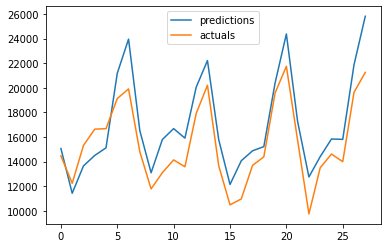

In [31]:
# R2 score and prediction graph

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

print(r2_score( list(test_ds)[0]['target'][-28:], predictions))

plt.plot(predictions)
plt.plot(list(test_ds)[0]['target'][-28:])
plt.legend(['predictions', 'actuals'])
plt.show()

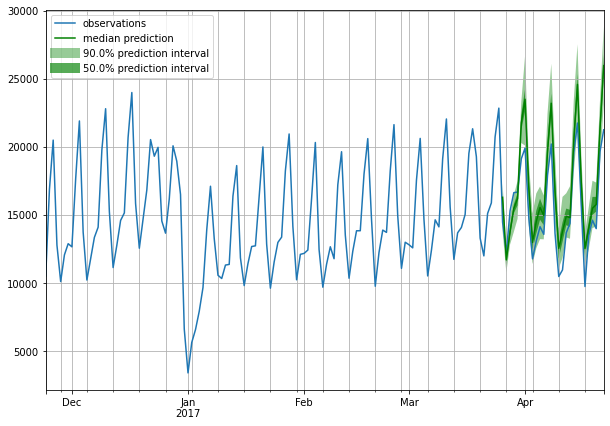

In [32]:
from gluonts import dataset
# Probability forecast graph
from gluonts.evaluation.backtest import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)

ts_entry = tss[0]
forecast_entry = forecasts[0]

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

plot_prob_forecasts(ts_entry, forecast_entry)
plt.show()

In [37]:
# Preparing holidays and reservations data and adding them into the ListDataset

X_reservations = pd.read_csv('/content/air_reserve.csv')
X_reservations.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [38]:
X_reservations['visit_date'] = pd.to_datetime(X_reservations['visit_datetime']).dt.date #freq to day
X_reservations.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01


In [39]:
X_reservations = pd.DataFrame(X_reservations.groupby('visit_date')['reserve_visitors'].sum())
X_reservations = X_reservations.reset_index(drop = False)

In [41]:
# Convert to datatime for merging correctly

y.date = pd.to_datetime(y.date)
X_reservations.visit_date = pd.to_datetime(X_reservations.visit_date)

# Merging and filling missing dates with 0
y = y.merge(X_reservations, left_on='date', right_on='visit_date', how='left').fillna(0)


In [43]:

# Preparing and merging holidays data
holidays = pd.read_csv('/content/date_info.csv')
holidays.calendar_date = pd.to_datetime(holidays.calendar_date)

y = y.merge(holidays, left_on = 'date', right_on = 'calendar_date', how = 'left').fillna(0)

In [44]:
y.head()

,date,y,visit_date,reserve_visitors,calendar_date,day_of_week,holiday_flg
0,2016-01-01,1033.0,2016-01-01 00:00:00,17.0,2016-01-01,Friday,1
1,2016-01-02,1764.0,2016-01-02 00:00:00,128.0,2016-01-02,Saturday,1
2,2016-01-03,2368.0,2016-01-03 00:00:00,53.0,2016-01-03,Sunday,1
3,2016-01-04,3326.0,2016-01-04 00:00:00,122.0,2016-01-04,Monday,0
4,2016-01-05,3927.0,2016-01-05 00:00:00,76.0,2016-01-05,Tuesday,0


In [45]:
# Preparing the ListDatasets

train_ds = ListDataset([{
    'target':y.loc[:450,'y'],
    'start':start,
    'feat_dynamic_real': y.loc[:450,['reserve_visitors', 'holiday_flg']].values
}], freq='H')

test_ds = ListDataset([{
    'target': y['y'], 
    'start': start, 
    'feat_dynamic_real': y.loc[:,['reserve_visitors', 'holiday_flg']].values
    }],freq='H')

In [46]:
# Same code for fitting a different model: this model contains the two additional regressors

np.random.seed(7)
mx.random.seed(7)

# Build and fit model
estimator = DeepAREstimator(
    prediction_length=28,
    context_length=100,
    freq='D',
    trainer=Trainer(ctx='gpu',
            epochs=5,
            learning_rate=1e-3,
            num_batches_per_epoch=100)
)

predictor = estimator.train(train_ds)

# Make Predictions
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

# Compute and print R2 score
print(r2_score( list(test_ds)[0]['target'][-28:], predictions))

100%|██████████| 100/100 [00:10<00:00,  9.56it/s, epoch=5/5, avg_epoch_loss=8.09]


0.8159606602779841


In [47]:
# Tuning the hyperparameters

np.random.seed(7)
mx.random.seed(7)

results = []

for learning_rate in [1e-4, 1e-2]:
  for num_layers in [2, 5]:
    for num_cells in [30, 100]:

      estimator = DeepAREstimator(
          prediction_length=28,
          freq='D',
          trainer=Trainer(# ctx="gpu", # remove if on Windows
                          epochs=10,
                          learning_rate=learning_rate,
                          num_batches_per_epoch=100
                        ),
          num_layers = num_layers,
          num_cells = num_cells,
      )

      predictor = estimator.train(train_ds)

      predictions = predictor.predict(test_ds)

      r2 = r2_score(list(predictions)[0].quantile(0.5), list(test_ds)[0]['target'][-28:])
      result = [learning_rate, num_layers, num_cells, r2]
      print(result)
      results.append(result)

100%|██████████| 100/100 [00:06<00:00, 16.43it/s, epoch=10/10, avg_epoch_loss=8.36]


[0.0001, 2, 30, 0.6055404901136057]


100%|██████████| 100/100 [00:06<00:00, 16.42it/s, epoch=10/10, avg_epoch_loss=8.26]


[0.0001, 2, 100, 0.6656502975511929]


100%|██████████| 100/100 [00:11<00:00,  8.80it/s, epoch=10/10, avg_epoch_loss=8.34]


[0.0001, 5, 30, 0.7884788511219776]


100%|██████████| 100/100 [00:11<00:00,  8.68it/s, epoch=10/10, avg_epoch_loss=8.26]


[0.0001, 5, 100, 0.8479747057661706]


100%|██████████| 100/100 [00:05<00:00, 16.78it/s, epoch=10/10, avg_epoch_loss=7.63]


[0.01, 2, 30, 0.8028488197404972]


100%|██████████| 100/100 [00:06<00:00, 15.98it/s, epoch=10/10, avg_epoch_loss=7.62]


[0.01, 2, 100, 0.8624983703592022]


100%|██████████| 100/100 [00:11<00:00,  8.77it/s, epoch=10/10, avg_epoch_loss=7.57]


[0.01, 5, 30, 0.8341781761117188]


100%|██████████| 100/100 [00:11<00:00,  8.94it/s, epoch=10/10, avg_epoch_loss=7.93]


[0.01, 5, 100, 0.8369484020908737]


In [48]:
results

[[0.0001, 2, 30, 0.6055404901136057],
 [0.0001, 2, 100, 0.6656502975511929],
 [0.0001, 5, 30, 0.7884788511219776],
 [0.0001, 5, 100, 0.8479747057661706],
 [0.01, 2, 30, 0.8028488197404972],
 [0.01, 2, 100, 0.8624983703592022],
 [0.01, 5, 30, 0.8341781761117188],
 [0.01, 5, 100, 0.8369484020908737]]

# Case 2: 


thanks:
https://github.com/joansu2004/DeepAR/blob/master/Model_3_Time%20series%20Forecasting_Price_With_DynFeat-Improved.ipynb

In [49]:
%matplotlib inline

from urllib.request import urlretrieve
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Import Dataset
DATA_HOST = 'https://data.open-power-system-data.org/time_series/2019-06-05'
ARCHIVE_NAME = 'time_series_60min_singleindex.csv'
FILE_NAME = ARCHIVE_NAME[:-4]

if not os.path.isfile(ARCHIVE_NAME):
    print("Downloading dataset...")
    urlretrieve(DATA_HOST + '/' + ARCHIVE_NAME, ARCHIVE_NAME)
    
else:
    print("File found. Skipping download")

In [52]:
# Columns of interest
filter_col = ['cet_cest_timestamp','DE_price_day_ahead','DE_load_actual_entsoe_transparency','DE_solar_generation_actual','DE_wind_generation_actual']

In [53]:
data_filtered_df=pd.read_csv("time_series_60min_singleindex.csv", usecols=filter_col)

In [54]:
data_filtered_df.columns

Index(['cet_cest_timestamp', 'DE_load_actual_entsoe_transparency',
       'DE_price_day_ahead', 'DE_solar_generation_actual',
       'DE_wind_generation_actual'],
      dtype='object')

In [55]:
data_filtered_df.shape

(125593, 5)

In [56]:
data_filtered_df.head()

,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_price_day_ahead,DE_solar_generation_actual,DE_wind_generation_actual
0,2005-01-01T00:00:00+0100,NaN,NaN,NaN,NaN
1,2005-01-01T01:00:00+0100,NaN,20.05,NaN,NaN
2,2005-01-01T02:00:00+0100,NaN,15.00,NaN,NaN
3,2005-01-01T03:00:00+0100,NaN,13.41,NaN,NaN
4,2005-01-01T04:00:00+0100,NaN,13.73,NaN,NaN


In [57]:
data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125593 entries, 0 to 125592
Data columns (total 5 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   cet_cest_timestamp                  125593 non-null  object 
 1   DE_load_actual_entsoe_transparency  37945 non-null   float64
 2   DE_price_day_ahead                  124927 non-null  float64
 3   DE_solar_generation_actual          64190 non-null   float64
 4   DE_wind_generation_actual           81758 non-null   float64
dtypes: float64(4), object(1)
memory usage: 4.8+ MB


In [58]:
from numpy.lib.shape_base import expand_dims
# Preprocessing the timesatmp column to get Year, Month , Day and Hour in single columns

time1 = data_filtered_df['cet_cest_timestamp'].str.split('-', expand=True)
time1

,0,1,2
0,2005,01,01T00:00:00+0100
1,2005,01,01T01:00:00+0100
2,2005,01,01T02:00:00+0100
3,2005,01,01T03:00:00+0100
4,2005,01,01T04:00:00+0100
...,...,...,...
125588,2019,04,30T21:00:00+0200
125589,2019,04,30T22:00:00+0200
125590,2019,04,30T23:00:00+0200
125591,2019,05,01T00:00:00+0200


In [59]:
time2 = time1.iloc[:,2].str.split('T',expand=True)
time2

,0,1
0,01,00:00:00+0100
1,01,01:00:00+0100
2,01,02:00:00+0100
3,01,03:00:00+0100
4,01,04:00:00+0100
...,...,...
125588,30,21:00:00+0200
125589,30,22:00:00+0200
125590,30,23:00:00+0200
125591,01,00:00:00+0200


In [61]:
time3 = time2.iloc[:,1].str.split('+',expand=True)
time3

,0,1
0,00:00:00,0100
1,01:00:00,0100
2,02:00:00,0100
3,03:00:00,0100
4,04:00:00,0100
...,...,...
125588,21:00:00,0200
125589,22:00:00,0200
125590,23:00:00,0200
125591,00:00:00,0200


In [62]:
time_df=pd.concat([time1.iloc[:,0:2],time2.iloc[:,0],time3.iloc[:,0]] ,axis=1)
time_df.columns=['Year','Month','Day','Hour']
time_df.head()

,Year,Month,Day,Hour
0,2005,01,01,00:00:00
1,2005,01,01,01:00:00
2,2005,01,01,02:00:00
3,2005,01,01,03:00:00
4,2005,01,01,04:00:00


In [63]:
data_filtered_df = pd.concat([time_df, data_filtered_df], axis=1)
data_filtered_df.head()

,Year,Month,Day,Hour,cet_cest_timestamp,DE_load_actual_entsoe_transparency,DE_price_day_ahead,DE_solar_generation_actual,DE_wind_generation_actual
0,2005,01,01,00:00:00,2005-01-01T00:00:00+0100,NaN,NaN,NaN,NaN
1,2005,01,01,01:00:00,2005-01-01T01:00:00+0100,NaN,20.05,NaN,NaN
2,2005,01,01,02:00:00,2005-01-01T02:00:00+0100,NaN,15.00,NaN,NaN
3,2005,01,01,03:00:00,2005-01-01T03:00:00+0100,NaN,13.41,NaN,NaN
4,2005,01,01,04:00:00,2005-01-01T04:00:00+0100,NaN,13.73,NaN,NaN


In [66]:
# Chequing how many NaN values there are in the first 7 days of January 2019

pd.set_option('display.max_rows', 750)
data_filtered_df[data_filtered_df['Year']=='2019'][data_filtered_df['Month']=='01'][data_filtered_df['Day']<='07'][filter_col[4]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


122712    23132.0
122713    24904.0
122714    25208.0
122715    26568.0
122716    28500.0
122717    29808.0
122718    31016.0
122719    31950.0
122720    32648.0
122721    32274.0
122722    33466.0
122723    35712.0
122724    35900.0
122725    36454.0
122726    36867.0
122727    36849.0
122728    37955.0
122729    38550.0
122730    38530.0
122731    38218.0
122732    38198.0
122733    37767.0
122734    36827.0
122735    36464.0
122736    34601.0
122737    33649.0
122738    33107.0
122739    32585.0
122740    32960.0
122741    34039.0
122742    35156.0
122743    35332.0
122744    34088.0
122745    32990.0
122746    32370.0
122747    32195.0
122748    32118.0
122749    31469.0
122750    29458.0
122751    27170.0
122752    25558.0
122753    24494.0
122754    22652.0
122755    20892.0
122756    19242.0
122757    17852.0
122758    16656.0
122759    15415.0
122760    15164.0
122761    15214.0
122762    14763.0
122763    15220.0
122764    15923.0
122765    16592.0
122766    16814.0
122767    

In [67]:
# Extracting the time series of interest
column_df=data_filtered_df.copy()

In [68]:
# Indexing by Datetime

column_df['Datetime'] = pd.to_datetime(column_df['Year']+'-'+column_df['Month']+'-'+column_df['Day']+' '+column_df['Hour'])
column_df = column_df.set_index('Datetime')
column_s1=column_df[filter_col[1]].copy()
column_s2=column_df[filter_col[2]].copy()
column_s3=column_df[filter_col[3]].copy()
column_s4=column_df[filter_col[4]].copy()

In [73]:
column_s2

Datetime
2005-01-01 00:00:00        NaN
2005-01-01 01:00:00        NaN
2005-01-01 02:00:00        NaN
2005-01-01 03:00:00        NaN
2005-01-01 04:00:00        NaN
                        ...   
2019-04-30 21:00:00    54612.0
2019-04-30 22:00:00    51309.0
2019-04-30 23:00:00    47886.0
2019-05-01 00:00:00    44594.0
2019-05-01 01:00:00    42599.0
Name: DE_load_actual_entsoe_transparency, Length: 125593, dtype: float64

In [70]:
# Function to split the whole multiyear time series in several 1-year slices
def make_time_series(mean_power_df, years):
    '''Creates as many time series as there are complete years.
    
      :param mean_power_df: A Pandas Series with time varying data. This dataframe should also be indexed by a datetime.
      :param years: A list of years (string format) to make time series out of, ex. ['2007', '2008'].
      
      :return: A list of pd.Series(), time series data.
      '''
    
    # store time series
    time_series = []
        
    # create time series for each year in years
    for i in range(len(years)):

        year = years[i]

        data=mean_power_df.loc[year+'-01-01 00:00:00':year+'-12-31 23:00:00']

        # create time series for the year
        time_series.append(pd.Series(data=data))
    
    # return list of time series
    return time_series
     

In [71]:
# test out the code above
# yearly time series for the complete years of interest
full_years = ['2015','2016','2017','2018']

# make time series
time_series_1 = make_time_series(column_s1, full_years)
time_series_2 = make_time_series(column_s2, full_years)
time_series_3 = make_time_series(column_s3, full_years)
time_series_4 = make_time_series(column_s4, full_years)

In [72]:
time_series_1

[Datetime
 2015-01-01 00:00:00    25.02
 2015-01-01 01:00:00    18.29
 2015-01-01 02:00:00    16.04
 2015-01-01 03:00:00    14.60
 2015-01-01 04:00:00    14.95
                        ...  
 2015-12-31 19:00:00    36.79
 2015-12-31 20:00:00    28.81
 2015-12-31 21:00:00    26.27
 2015-12-31 22:00:00    29.99
 2015-12-31 23:00:00    31.59
 Name: DE_price_day_ahead, Length: 8760, dtype: float64, Datetime
 2016-01-01 00:00:00    23.86
 2016-01-01 01:00:00    22.39
 2016-01-01 02:00:00    20.59
 2016-01-01 03:00:00    16.81
 2016-01-01 04:00:00    17.41
                        ...  
 2016-12-31 19:00:00    40.84
 2016-12-31 20:00:00    35.05
 2016-12-31 21:00:00    33.02
 2016-12-31 22:00:00    33.71
 2016-12-31 23:00:00    27.95
 Name: DE_price_day_ahead, Length: 8784, dtype: float64, Datetime
 2017-01-01 00:00:00    20.96
 2017-01-01 01:00:00    20.90
 2017-01-01 02:00:00    18.13
 2017-01-01 03:00:00    16.03
 2017-01-01 04:00:00    16.43
                        ...  
 2017-12-31 19:00:

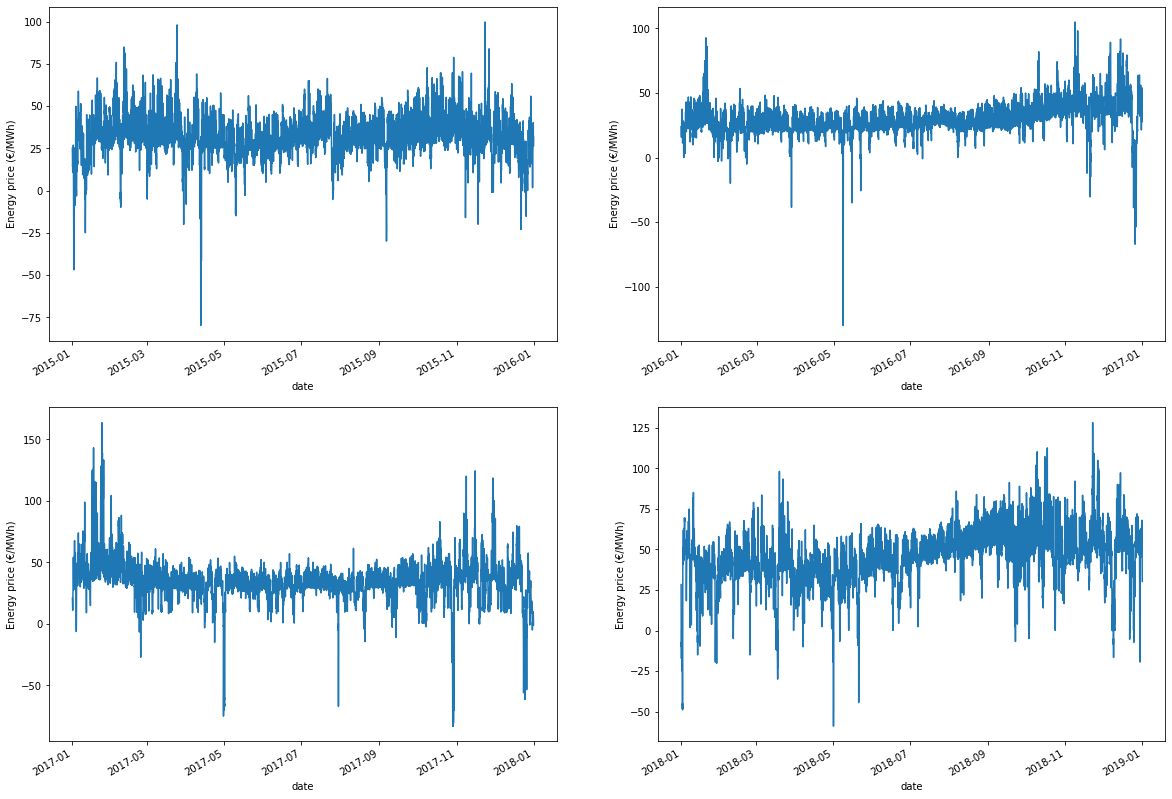

In [74]:
# display time series: Energy price

# display time series: Energy price
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=False)
axx = axs.ravel()
for i in range(len(full_years)):
    time_series_1[i].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Energy price (€/MWh)")   
    axx[i].grid(which='minor', axis='x')

In [75]:
# Price statistics
print('Year' + '   ' + 'mean' + '   ' + 'std')
print('----' + '   ' + '----' + '   ' + '----')
for i in range(len(full_years)):
    print(full_years[i] + '   ' + str(round(time_series_1[i].mean(),1)) + '   ' + str(round(time_series_1[i].std(),1)))

Year   mean   std
----   ----   ----
2015   31.6   12.7
2016   29.0   12.5
2017   34.2   17.6
2018   44.9   17.6


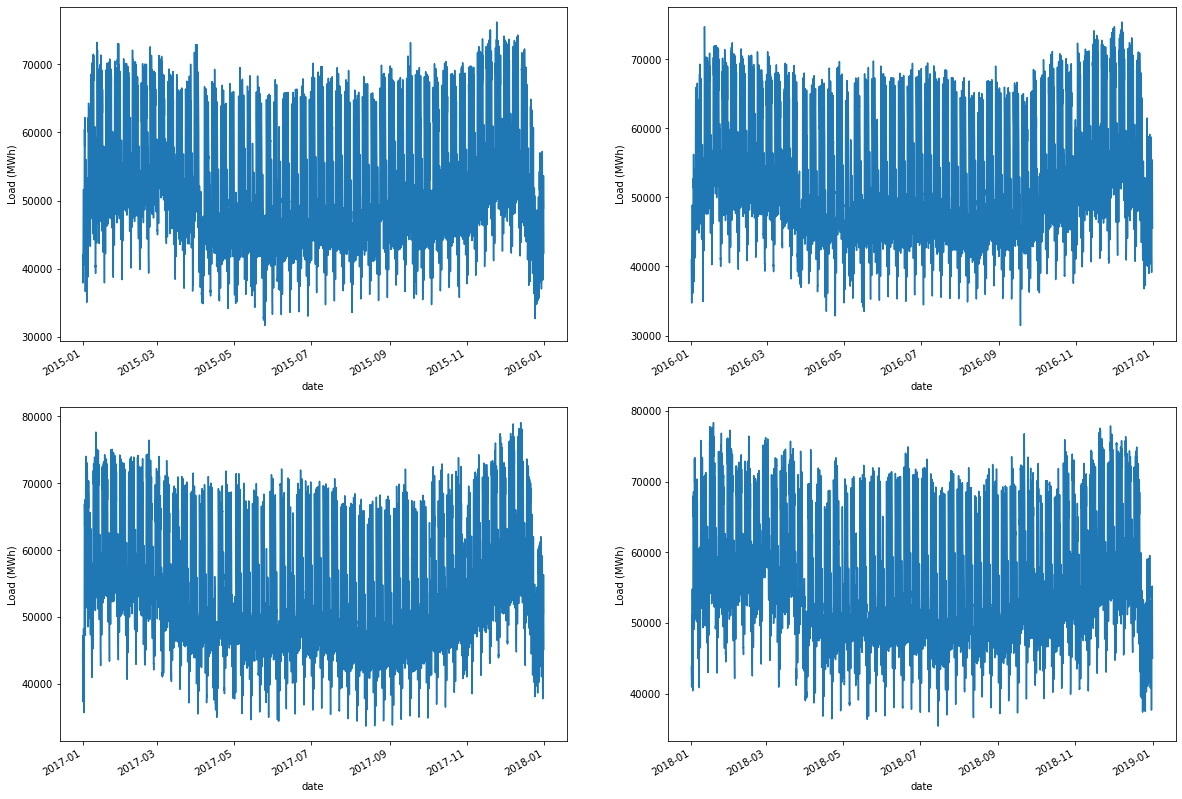

In [76]:
# display time series: Load
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=False)
axx = axs.ravel()
for i in range(len(full_years)):
    time_series_2[i].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Load (MWh)")   
    axx[i].grid(which='minor', axis='x')

In [77]:
# Load statistics
print('Year' + '   ' + 'mean' + '   ' + 'std')
print('----' + '   ' + '----' + '   ' + '----')
for i in range(len(full_years)):
    print(full_years[i] + '   ' + str(round(time_series_2[i].mean(),1)) + '   ' + str(round(time_series_2[i].std(),1)))

Year   mean   std
----   ----   ----
2015   54557.5   9983.4
2016   54768.3   9788.4
2017   56309.5   10263.1
2018   58060.8   9894.0


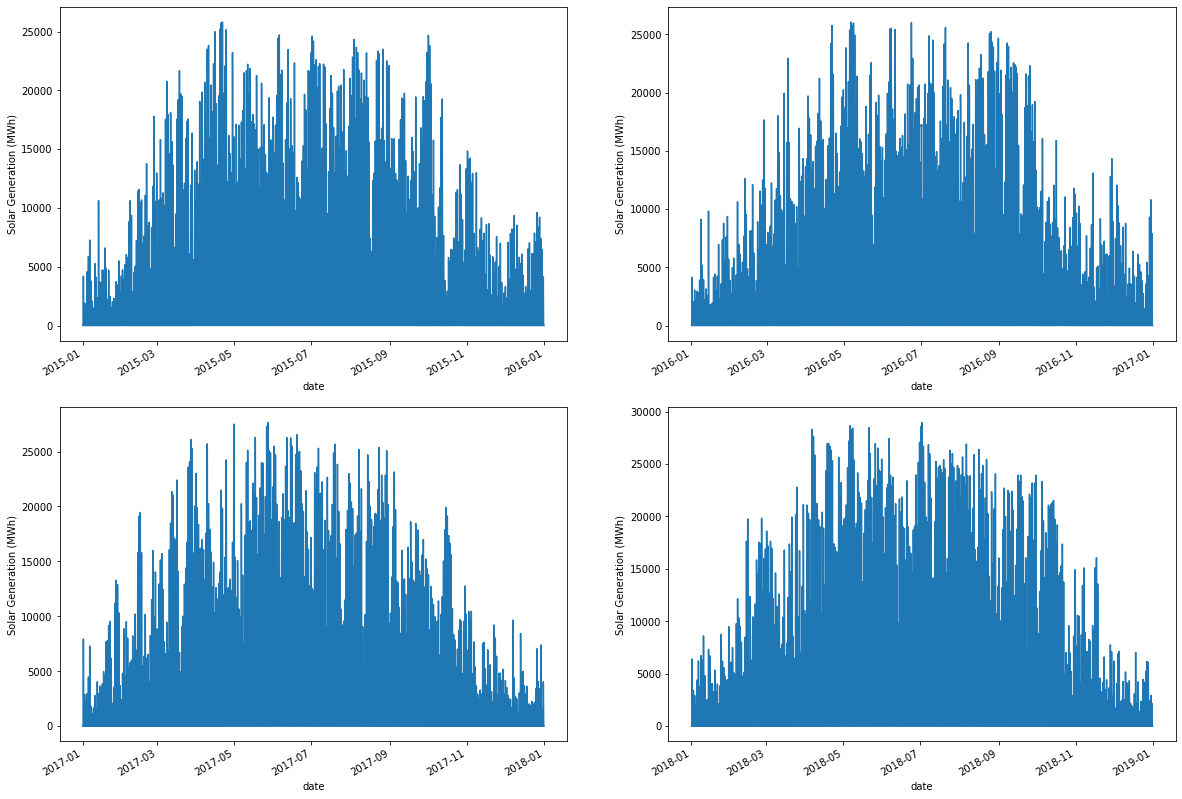

In [78]:
# display time series: Solar Generation
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=False)
axx = axs.ravel()
for i in range(len(full_years)):
    time_series_3[i].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Solar Generation (MWh)")   
    axx[i].grid(which='minor', axis='x')

In [79]:
# Solar statistics
print('Year' + '   ' + 'mean' + '   ' + 'std')
print('----' + '   ' + '----' + '   ' + '----')
for i in range(len(full_years)):
    print(full_years[i] + '   ' + str(round(time_series_3[i].mean(),1)) + '   ' + str(round(time_series_3[i].std(),1)))

Year   mean   std
----   ----   ----
2015   3984.8   6043.2
2016   3934.7   6032.5
2017   4096.2   6314.3
2018   4707.1   7165.3


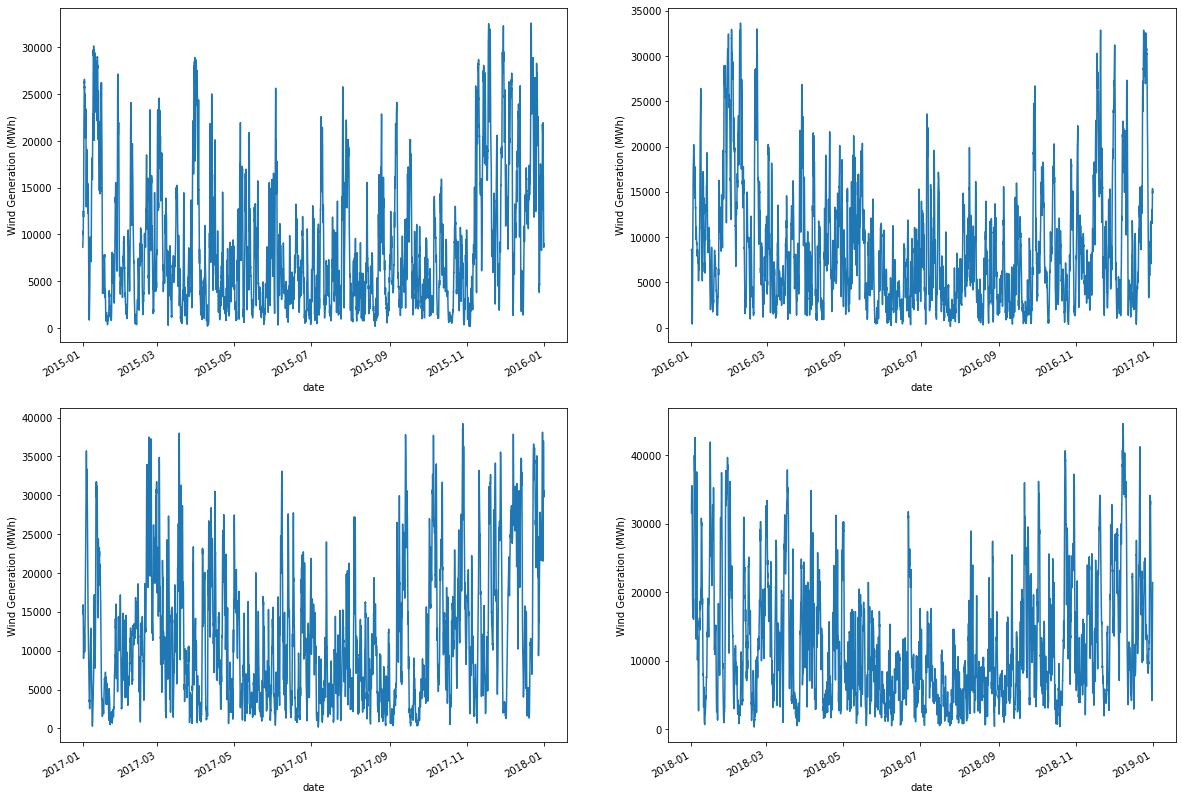

In [80]:
# display time series: Wind Generation
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=False)
axx = axs.ravel()
for i in range(len(full_years)):
    time_series_4[i].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Wind Generation (MWh)")   
    axx[i].grid(which='minor', axis='x')

In [81]:
# Wind statistics
print('Year' + '   ' + 'mean' + '   ' + 'std')
print('----' + '   ' + '----' + '   ' + '----')
for i in range(len(full_years)):
    print(full_years[i] + '   ' + str(round(time_series_4[i].mean(),1)) + '   ' + str(round(time_series_4[i].std(),1)))

Year   mean   std
----   ----   ----
2015   8843.5   7158.1
2016   8766.1   6846.0
2017   11718.2   8811.0
2018   12394.5   9048.4


## Train and Test splits
Often times one is interested in evaluating the model or tuning its hyperparameters by looking at error metrics on a hold-out test set. Here we split the available data into train and test sets for evaluating the trained model. For standard machine learning tasks such as classification and regression, one typically obtains this split by randomly separating examples into train and test sets. However, in forecasting it is important to do this train/test split based on time rather than by time series.

In this example, we will reserve the last section of each of the time series for evalutation purpose and use only the first part as training data.

In [82]:
# we use 1 hour frequency for the time series

freq = 'H'

# we predict for 7 days
prediction_length = 7 * 24

# we also use 7 days as context length
context_length = prediction_length

# to use a part of the time series to test
testing = True

# Replace NaN with "NaN" in the target time series so that DeepAR can handle with them and with mean value in dynamic feature time series
x="NaN"
for i in range(len(full_years)):
    time_series_1[i]=time_series_1[i].fillna(x)
    time_series_2[i]=time_series_2[i].fillna(time_series_2[i].mean())
    time_series_3[i]=time_series_3[i].fillna(time_series_3[i].mean())
    time_series_4[i]=time_series_4[i].fillna(time_series_4[i].mean())

In [84]:
time_series_1

[Datetime
 2015-01-01 00:00:00    25.02
 2015-01-01 01:00:00    18.29
 2015-01-01 02:00:00    16.04
 2015-01-01 03:00:00     14.6
 2015-01-01 04:00:00    14.95
                        ...  
 2015-12-31 19:00:00    36.79
 2015-12-31 20:00:00    28.81
 2015-12-31 21:00:00    26.27
 2015-12-31 22:00:00    29.99
 2015-12-31 23:00:00    31.59
 Name: DE_price_day_ahead, Length: 8760, dtype: object, Datetime
 2016-01-01 00:00:00    23.86
 2016-01-01 01:00:00    22.39
 2016-01-01 02:00:00    20.59
 2016-01-01 03:00:00    16.81
 2016-01-01 04:00:00    17.41
                        ...  
 2016-12-31 19:00:00    40.84
 2016-12-31 20:00:00    35.05
 2016-12-31 21:00:00    33.02
 2016-12-31 22:00:00    33.71
 2016-12-31 23:00:00    27.95
 Name: DE_price_day_ahead, Length: 8784, dtype: object, Datetime
 2017-01-01 00:00:00    20.96
 2017-01-01 01:00:00     20.9
 2017-01-01 02:00:00    18.13
 2017-01-01 03:00:00    16.03
 2017-01-01 04:00:00    16.43
                        ...  
 2017-12-31 19:00:00

The DeepAR JSON input format represents each time series as a JSON object (dictionary). In the simplest case each time series just consists of a start time stamp (start) and a list of values (target). DeepAR also supports the fields dynamic_feat for time-series features and cat for categorical features, which we will use later.

In [85]:
if testing == True:
    training_data = [
        {
            "start": str(ts.index[0]),
            "target": ts[:-prediction_length].tolist(),
            "dynamic_feat": [time_series_2[i][:-prediction_length].tolist(),time_series_3[i][:-prediction_length].tolist(),time_series_4[i][:-prediction_length].tolist()]
        }
        for i, ts in enumerate(time_series_1)
    ]

As test data, we will consider time series extending beyond the training range: these will be used for computing test scores, by using the trained model to forecast their trailing 7 days, and comparing predictions with actual values. To evaluate our model performance on more than one week, we generate test data that extends to 1, 2, 3, 4 weeks beyond the training range. This way we perform rolling evaluation of our model.

In [86]:
test_data = [
    {
        "start": str(ts.index[0]),
        "target": ts.tolist(),
        "dynamic_feat": [time_series_2[i].tolist(),time_series_3[i].tolist(),time_series_4[i].tolist()]
    }
    for i,ts in enumerate(time_series_1)
]

if testing == False:
    training_data = test_data

### Gluonts

### Saving Data, Locally
The next helper function will write each time series to a single JSON line, using the new line character '\n'. The data is also encoded and written to a filename that we specify.